# Datasets

Box Office Mojo:
- bom.movie_gross.csv.gz

IMDB (more infor info [here](https://www.imdb.com/interfaces/)):
- imdb.name.basics.csv.gz
- imdb.title.akas.csv.gz
- imdb.title.basics.csv.gz
- imdb.title.crew.csv.gz
- imdb.title.principals.csv.gz
- imdb.title.ratings.csv.gz

Rotten Tomatoes:
- rt.movie_info.tsv.gz
- rt.reviews.tsv.gz

TheMovieDB:
- tmdb.movies.csv.gz

The Numbers:
- tn.movie_budgets.csv.gz

# Genres Data Exploration

## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 100) # Allows Jupyter Notebook to expand how much data is shown.

## Reading in IMDB's title.basics dataset

In [2]:
imdb_title_basics_df = pd.read_csv('..\zippedData/imdb.title.basics.csv.gz')
g_df = imdb_title_basics_df.copy() #g stands for genre(s)
g_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


## Identifying Duplicates in IMDB's title.basics

Now I want to see how many duplicates are in the `'primary_title'` column.

I probably want to see duplicates later on so I might as well define a function.

In [3]:
def determine_dupes(series):
    series_vcs = pd.Series(series.value_counts())
    series_dupes = [series_vcs.index[index] for index in list(range(len(series_vcs))) if series_vcs.values[index] > 1]
    print("Amount of unique duplicate movie title: " + str(len(series_dupes)))
    print("Total amount of duplicate movie titles: " + str(series_vcs[0:len(series_dupes)].sum()))
    
    return series_vcs

determine_dupes(g_df['primary_title'])

Amount of unique duplicate movie title: 6182
Total amount of duplicate movie titles: 16255


Home                                         24
Broken                                       20
The Return                                   20
Homecoming                                   16
Alone                                        16
                                             ..
Ward 8: The Past, The Present, The Future     1
Bergmandlc                                    1
Post Debate Special                           1
Jana Gana Mana                                1
To My Dear Granny                             1
Name: primary_title, Length: 136071, dtype: int64

## Creating `'title_dupes_df'` DataFrame to include new movie titles with movie name and movie year for duplicates

To do this, I need to create a new DataFrame called `title_dupes_df`.

But I first need to create a unique ID column within `g_df` so that I can easily merge `title_dupes_df` later.

In [4]:
g_df.reset_index(inplace=True)
g_df.rename(columns={'index' : 'g_unique_id'}, inplace=True)
g_df

,g_unique_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...
146139,146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


I now need to create a dataframe of all the duplicate movie titles, and then create a new column called `'updated_title'` that includes the name of the movie and the year of the movie.

In [5]:
title_vcs = pd.Series(g_df['primary_title'].value_counts())
title_dupes = [title_vcs.index[index] for index in list(range(len(title_vcs))) if title_vcs.values[index] > 1]
title_dupes_df = g_df[g_df['primary_title'].isin(title_dupes)].copy()
title_dupes_df

,g_unique_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
19,19,tt0247643,Los pájaros se van con la muerte,Los pájaros se van con la muerte,2011,110.0,"Drama,Mystery"
21,21,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama"
30,30,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy
34,34,tt0297400,Snowblind,Snowblind,2015,NaN,"Crime,Drama"
...,...,...,...,...,...,...,...
146119,146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller"
146120,146120,tt9913936,Paradise,Paradise,2019,NaN,"Crime,Drama"
146125,146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary
146134,146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary


In [6]:
title_dupes_df['updated_title'] = title_dupes_df['primary_title'] + ' ' + title_dupes_df['start_year'].astype(str)
title_dupes_df

,g_unique_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres,updated_title
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot 2017
19,19,tt0247643,Los pájaros se van con la muerte,Los pájaros se van con la muerte,2011,110.0,"Drama,Mystery",Los pájaros se van con la muerte 2011
21,21,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama",Godfather 2012
30,30,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,Life's a Beach 2012
34,34,tt0297400,Snowblind,Snowblind,2015,NaN,"Crime,Drama",Snowblind 2015
...,...,...,...,...,...,...,...,...
146119,146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller",Bacchanalia 2017
146120,146120,tt9913936,Paradise,Paradise,2019,NaN,"Crime,Drama",Paradise 2019
146125,146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary,Albatross 2017
146134,146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,Drømmeland 2019


I want to see how many unique duplicates there are in `title_dupes_df` and compare it to how many unique duplicates there were in `g_df`.

Over 66% of the records that once weren't unique are now unique!

In [7]:
determine_dupes(title_dupes_df['updated_title'])

Amount of unique duplicate movie title: 1870
Total amount of duplicate movie titles: 3942


Ângelo de Sousa - Tudo o Que Sou Capaz 2010    7
Split 2016                                     6
Inside Out 2011                                5
Broken 2012                                    4
The Return 2016                                4
                                              ..
Beautiful Girl 2015                            1
Sweetheart 2016                                1
Salto Mortale 2014                             1
Barbie 2011                                    1
The Manor 2018                                 1
Name: updated_title, Length: 14183, dtype: int64

Now lets remove the columns that we don't want to duplicate during the merge.

In [8]:
remove_columns = ['tconst', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']
title_dupes_df.drop(columns=remove_columns, inplace=True)
title_dupes_df

,g_unique_id,updated_title
6,6,Bigfoot 2017
19,19,Los pájaros se van con la muerte 2011
21,21,Godfather 2012
30,30,Life's a Beach 2012
34,34,Snowblind 2015
...,...,...
146119,146119,Bacchanalia 2017
146120,146120,Paradise 2019
146125,146125,Albatross 2017
146134,146134,Drømmeland 2019


## Merging `'title_dupes_df1'` with `'g_df'`

I now need too merge `title_dupes_df` into `g_df`.

In [9]:
g_and_dupes_df = pd.merge(left=g_df, right=title_dupes_df, on=['g_unique_id'], how ='left')
g_and_dupes_df.head(25)

,g_unique_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres,updated_title
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN
5,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot 2017
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",NaN
8,8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",NaN
9,9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,NaN


Now I need to assign non-null values in the `'updated_title'` column to their respective `'primary_title`'. I found it easiest to create a new column that tells me whether or not a non-null value is in the `'updated_title'` column.

In [10]:
# THIS CODE BLOCK WILL TAKE ~1 MINUTE TO FINISH RUNNING

g_and_dupes_df['is_title_NaN'] = g_and_dupes_df['updated_title'].isnull()
g_and_dupes_df.head(25)
for movie_index in list(range(len(g_and_dupes_df.index))):
    if ~g_and_dupes_df.loc[movie_index, 'is_title_NaN']:
        g_and_dupes_df.loc[movie_index, 'primary_title'] = g_and_dupes_df.loc[movie_index, 'updated_title']
g_and_dupes_df.head(25)

,g_unique_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres,updated_title,is_title_NaN
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,True
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN,True
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN,True
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN,True
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN,True
5,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,True
6,6,tt0112502,Bigfoot 2017,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot 2017,False
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",NaN,True
8,8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",NaN,True
9,9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,NaN,True


Now lets remove the columns that we don't need for further data exploration.

In [11]:
remove_columns = ['g_unique_id','updated_title', 'is_title_NaN']
g_and_dupes_df.drop(columns=remove_columns, inplace=True)

In [12]:
g_df = g_and_dupes_df.copy()
display(g_df.head(25))
g_df.info()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot 2017,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 12.8+ MB


# Using Julian's Exploratory Data

Attempting to merge Julian's data with my own...

## Reading in TheNumber's movie_budgets dataset

In [13]:
# Credit to Julian
tn_movie_budgets_df = pd.read_csv('..\zippedData/tn.movie_budgets.csv.gz')
mm_df = tn_movie_budgets_df.copy() #mm stands for money_metrics
display(mm_df)
mm_df.info()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Drop `'id'` column as it only adds confusion.

In [14]:
mm_df.drop(columns='id', inplace=True)

## Converting columns with \$'s (`str`) to `int` 

In [15]:
# Credit to Julian
def clean_a_money_column(df, series_title):
    df[series_title] = df[series_title].str.replace('$','')
    df[series_title] = df[series_title].str.replace(',','')
    df[series_title] = pd.to_numeric(df[series_title])
    
    return df

mm_df = clean_a_money_column(mm_df,'worldwide_gross')
mm_df = clean_a_money_column(mm_df,'domestic_gross')
mm_df = clean_a_money_column(mm_df,'production_budget')
display(mm_df)
mm_df.info() # Notice that the dtype for columns 3 thru 5 are now int64 instead of object

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,7000,0,0
5778,"Apr 2, 1999",Following,6000,48482,240495
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 226.0+ KB


## Profit Margin & Return on Investment

Profit Margin (PM): $(Revenue-Cost)/Revenue$

Return on Investment (ROI): $Revenue/Cost$

In [16]:
# Credit to Julian
numerator = mm_df['worldwide_gross'] - mm_df['production_budget']
mm_df['profit_margin'] = (numerator*100)/mm_df['worldwide_gross']
mm_df.loc[mm_df['profit_margin'] == float('-inf'), 'profit_margin'] = 0
mm_df['ROI'] = mm_df['worldwide_gross']/mm_df['production_budget']
# mm_df.sort_values(['Profit Margin'], ascending=False, inplace=True) # Sort by largest Profit Margin
mm_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696
...,...,...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000
5778,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600
5780,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000


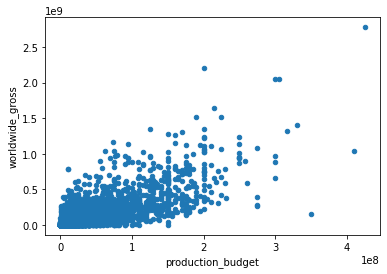

In [17]:
# Credit to Julian
# Scatter plot of worldwide gross revenue vs. production budget cost:
mm_df.plot('production_budget', 'worldwide_gross', kind='scatter');

## Adding `'Year'` column

In [18]:
# Credit to Julian
mm_df['year'] = pd.to_numeric(mm_df['release_date'].map(lambda x: x[-4:]))
mm_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017
...,...,...,...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018
5778,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500,1999
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600,2005
5780,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000,2015


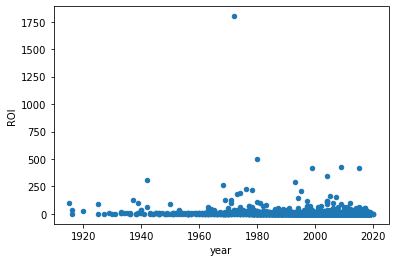

In [19]:
# Credit to Julian
# Scatter plot of ROI vs. Year of Movie Release:
mm_df.plot('year', 'ROI', kind='scatter');

## Dealing with Duplicates in TheNumbers' movie_budgets

My approach towards this is the same as my approach early towards IMDB's title.basics dataset. Reference that section if you need to follow along.

In [20]:
determine_dupes(mm_df['movie'])

Amount of unique duplicate movie title: 81
Total amount of duplicate movie titles: 165


Home                   3
Halloween              3
King Kong              3
Crash                  2
Hercules               2
                      ..
Unforgiven             1
Shooter                1
Unfaithful             1
The Mexican            1
Blast from the Past    1
Name: movie, Length: 5698, dtype: int64

In [21]:
mm_df.reset_index(inplace=True)
mm_df.rename(columns={'index' : 'mm_unique_id'}, inplace=True)
# mm_df

In [22]:
title_vcs = pd.Series(mm_df['movie'].value_counts())
title_dupes = [title_vcs.index[index] for index in list(range(len(title_vcs))) if title_vcs.values[index] > 1]
title_dupes_df = mm_df[mm_df['movie'].isin(title_dupes)].copy()
# title_dupes_df

In [23]:
title_dupes_df['updated_title'] = title_dupes_df['movie'] + ' ' + title_dupes_df['year'].astype(str)
# title_dupes_df

In [24]:
determine_dupes(title_dupes_df['updated_title'])

Amount of unique duplicate movie title: 1
Total amount of duplicate movie titles: 2


Home 2009                         2
Pinocchio 1940                    1
A Nightmare on Elm Street 2010    1
Hamlet 1996                       1
The Signal 2008                   1
                                 ..
Godzilla 1998                     1
Cinderella 2015                   1
Left Behind 2001                  1
Dangerous Liaisons 1988           1
Beauty and the Beast 2017         1
Name: updated_title, Length: 164, dtype: int64

In [25]:
remove_columns = ['release_date', 'movie', 'production_budget', 'domestic_gross',
                  'worldwide_gross', 'profit_margin', 'ROI', 'year']
title_dupes_df.drop(columns=remove_columns, inplace=True)
# title_dupes_df

In [26]:
mm_and_dupes_df = pd.merge(left=mm_df, right=title_dupes_df, on=['mm_unique_id'], how ='left')
# mm_and_dupes_df.head(25)

In [27]:
mm_and_dupes_df['is_title_NaN'] = mm_and_dupes_df['updated_title'].isnull()
mm_and_dupes_df.head(25)
for movie_index in list(range(len(mm_and_dupes_df.index))):
    if ~mm_and_dupes_df.loc[movie_index, 'is_title_NaN']:
        mm_and_dupes_df.loc[movie_index, 'movie'] = mm_and_dupes_df.loc[movie_index, 'updated_title']
# mm_and_dupes_df.head(100)

In [28]:
mm_and_dupes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mm_unique_id       5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int64  
 4   domestic_gross     5782 non-null   int64  
 5   worldwide_gross    5782 non-null   int64  
 6   profit_margin      5782 non-null   float64
 7   ROI                5782 non-null   float64
 8   year               5782 non-null   int64  
 9   updated_title      165 non-null    object 
 10  is_title_NaN       5782 non-null   bool   
dtypes: bool(1), float64(2), int64(5), object(3)
memory usage: 662.5+ KB


In [29]:
remove_columns = ['mm_unique_id','updated_title', 'is_title_NaN']
mm_and_dupes_df.drop(columns=remove_columns, inplace=True)

In [30]:
mm_df = mm_and_dupes_df.copy()
display(mm_df.head(25))
mm_df.info()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,85.097242,6.710167,2015
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,85.352522,6.827114,2018
7,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,68.860947,3.211401,2007
8,"Nov 17, 2017",Justice League,300000000,229024295,655945209,54.264473,2.186484,2017
9,"Nov 6, 2015",Spectre,300000000,200074175,879620923,65.894399,2.932070,2015


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   int64  
 3   domestic_gross     5782 non-null   int64  
 4   worldwide_gross    5782 non-null   int64  
 5   profit_margin      5782 non-null   float64
 6   ROI                5782 non-null   float64
 7   year               5782 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 566.5+ KB


## Merging The Numbers' movie_budgets with IMDB's title.basics

In order to perform a merge later on, I need to rename the movie title column, `'primary_title'`, within IMDB's title.basics.

In [31]:
g_df.rename(columns={'primary_title' : 'movie'}, inplace=True)
display(g_df)

,tconst,movie,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


Left join g_df into mm_df:

In [32]:
mm_and_g_df = pd.merge(left=mm_df, right=g_df, on='movie', how ='left')

In [33]:
display(mm_and_g_df)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,2011.0,93.0,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,tt6565702,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5789,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,tt7837402,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller"
5790,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500,1999,NaN,NaN,NaN,NaN,NaN
5791,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600,2005,NaN,NaN,NaN,NaN,NaN
5792,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000,2015,tt2107644,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller"


An additional merge is necessary because some of the movie titles in `mm_df` don't have duplicates and didn't need to be renamed with a year. Some of the values that just got merged from `g_df` didn't associate to a record in `mm_df` because it was renamed with a year and couldn't find it's match in `mm_df`. To fix this, I now want to merge an unaltered copy of the original `imdb_title_basics_df` with `mm_and_g_df`. With that being said, I will introduce more duplicates, but it will be manageable.

In [34]:
unaltered_g_df = imdb_title_basics_df.copy()
unaltered_g_df.rename(columns={'primary_title' : 'movie'}, inplace=True)

In [35]:
mm_and_g_copy_df = mm_and_g_df.copy()

In [36]:
mm_and_g_df = pd.merge(left=mm_and_g_copy_df, right=unaltered_g_df, on='movie', how ='left')

In [37]:
display(mm_and_g_df.info())
# display(test_mm_and_g_df.head(50))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6966 entries, 0 to 6965
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       6966 non-null   object 
 1   movie              6966 non-null   object 
 2   production_budget  6966 non-null   int64  
 3   domestic_gross     6966 non-null   int64  
 4   worldwide_gross    6966 non-null   int64  
 5   profit_margin      6966 non-null   float64
 6   ROI                6966 non-null   float64
 7   year               6966 non-null   int64  
 8   tconst_x           1764 non-null   object 
 9   original_title_x   1764 non-null   object 
 10  start_year_x       1764 non-null   float64
 11  runtime_minutes_x  1663 non-null   float64
 12  genres_x           1749 non-null   object 
 13  tconst_y           3423 non-null   object 
 14  original_title_y   3422 non-null   object 
 15  start_year_y       3423 non-null   float64
 16  runtime_minutes_y  2999 

None

In [38]:
determine_dupes(mm_and_g_df['movie'])

Amount of unique duplicate movie title: 533
Total amount of duplicate movie titles: 1718


The Return                                    20
Freedom                                       14
The Journey                                   11
Trapped                                       10
Forget Me Not                                 10
                                              ..
A Nightmare On Elm Street: The Dream Child     1
Le Fabuleux destin d'AmÃ©lie Poulain           1
Brigham City                                   1
Do the Right Thing                             1
Blast from the Past                            1
Name: movie, Length: 5781, dtype: int64

In [39]:
mm_and_g_df['is_tconst_x_NaN'] = mm_and_g_df['tconst_x'].isnull()
mm_and_g_df['is_tconst_y_NaN'] = mm_and_g_df['tconst_y'].isnull()

for movie_index in list(range(len(mm_and_g_df.index))):
    if (mm_and_g_df.loc[movie_index, 'is_tconst_x_NaN']) and (~mm_and_g_df.loc[movie_index, 'is_tconst_y_NaN'])\
        and (mm_and_g_df.loc[movie_index, 'start_year_y'].astype('int64') == mm_and_g_df.loc[movie_index, 'year']):
            mm_and_g_df.loc[movie_index, 'tconst_x'] = mm_and_g_df.loc[movie_index, 'tconst_y']
            mm_and_g_df.loc[movie_index, 'original_title_x'] = mm_and_g_df.loc[movie_index, 'original_title_y']
            mm_and_g_df.loc[movie_index, 'start_year_x'] = mm_and_g_df.loc[movie_index, 'start_year_y']
            mm_and_g_df.loc[movie_index, 'runtime_minutes_x'] = mm_and_g_df.loc[movie_index, 'runtime_minutes_y']
            mm_and_g_df.loc[movie_index, 'genres_x'] = mm_and_g_df.loc[movie_index, 'genres_y']

In [40]:
remove_columns = ['is_tconst_x_NaN', 'is_tconst_y_NaN', 'tconst_y', 'original_title_y', 
                  'start_year_y', 'runtime_minutes_y', 'genres_y']
mm_and_g_df.drop(columns=remove_columns, inplace=True)

In [41]:
mm_and_g_df.rename(columns={'tconst_x': 'tconst', 'original_title_x': 'original_title',
                                 'start_year_x': 'start_year', 'runtime_minutes_x': 'runtime_minutes',
                                 'genres_x': 'genres'}, inplace=True)

In [42]:
display(mm_and_g_df.head(1))
mm_and_g_df.shape

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,2011.0,93.0,Horror


(6966, 13)

In [43]:
mm_and_g_null_values = mm_and_g_df['tconst'].isna().sum()
print(f'Rows with Null Values in tconst Column: {mm_and_g_null_values}')

Rows with Null Values in tconst Column: 4889


In [44]:
mm_and_g_df.dropna(subset=['tconst'], axis=0, inplace=True)

In [45]:
display(mm_and_g_df.head(100))
display(mm_and_g_df.info())

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,2011.0,93.0,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,tt6565702,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,85.352522,6.827114,2018,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
8,"Nov 17, 2017",Justice League,300000000,229024295,655945209,54.264473,2.186484,2017,tt0974015,Justice League,2017.0,120.0,"Action,Adventure,Fantasy"
9,"Nov 6, 2015",Spectre,300000000,200074175,879620923,65.894399,2.932070,2015,tt2379713,Spectre,2015.0,148.0,"Action,Adventure,Thriller"
10,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,74.641268,3.943415,2012,tt1345836,The Dark Knight Rises,2012.0,164.0,"Action,Thriller"
11,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,30.052383,1.429641,2018,tt3778644,Solo: A Star Wars Story,2018.0,135.0,"Action,Adventure,Fantasy"
12,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,-5.768370,0.945462,2013,tt1210819,The Lone Ranger,2013.0,150.0,"Action,Adventure,Western"


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 6964
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       2077 non-null   object 
 1   movie              2077 non-null   object 
 2   production_budget  2077 non-null   int64  
 3   domestic_gross     2077 non-null   int64  
 4   worldwide_gross    2077 non-null   int64  
 5   profit_margin      2077 non-null   float64
 6   ROI                2077 non-null   float64
 7   year               2077 non-null   int64  
 8   tconst             2077 non-null   object 
 9   original_title     2077 non-null   object 
 10  start_year         2077 non-null   float64
 11  runtime_minutes    1960 non-null   float64
 12  genres             2058 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage: 227.2+ KB


## Data Cleaning...

First off, Avatar is not a Horror film... It is an Action, Adventure, Fantasy. So let's first change that.

In [46]:
mm_and_g_df.loc[mm_and_g_df['movie'] == 'Avatar', 'genres'] = "Action,Adventure,Fantasy"

Now I need to create a unique ID column in the newly merged DataFrame.

In [47]:
mm_and_g_df.reset_index(inplace=True)
mm_and_g_df.rename(columns={'index' : 'unique_id'}, inplace=True)
mm_and_g_df

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
0,0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,2011.0,93.0,"Action,Adventure,Fantasy"
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,tt6565702,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,85.352522,6.827114,2018,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,6949,"Apr 28, 2006",Clean,10000,138711,138711,92.790766,13.871100,2006,tt6619196,Clean,2017.0,70.0,"Comedy,Drama,Horror"
2073,6953,"Apr 1, 1996",Bang,10000,527,527,-1797.533207,0.052700,1996,tt6616538,Bang,2015.0,NaN,NaN
2074,6956,"Jan 13, 2012",Newlyweds,9000,4584,4584,-96.335079,0.509333,2012,tt1880418,Newlyweds,2011.0,95.0,"Comedy,Drama"
2075,6961,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,tt7837402,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller"


In [48]:
determine_dupes(mm_and_g_df['movie'])

Amount of unique duplicate movie title: 52
Total amount of duplicate movie titles: 115


Home 2015                4
The Promise              4
Redemption               4
The Circle               3
The Prince               3
                        ..
Fifty Shades of Black    1
Water for Elephants      1
The Finest Hours         1
Drinking Buddies         1
Factory Girl             1
Name: movie, Length: 2014, dtype: int64

In [49]:
series_vcs = pd.Series(mm_and_g_df['movie'].value_counts())
series_dupes = [series_vcs.index[index] for index in list(range(len(series_vcs))) if series_vcs.values[index] > 1]
sorted(series_dupes)

['A Better Life',
 'Abduction',
 'Absentia',
 'Addicted',
 'After',
 'Alice in Wonderland 2010',
 'Believe',
 'Big Eyes',
 'Brotherly Love',
 'Brothers 2015',
 'Burlesque',
 'Cinderella 2015',
 'Coco',
 'Crossroads 2015',
 'Cyrus',
 'Denial',
 'Destiny',
 'Exeter',
 'Heist 2015',
 'Hercules 2014',
 'Highway',
 'Home 2015',
 'Homefront',
 'Hush',
 'Joe',
 'Leap Year',
 'Let There Be Light',
 'Lights Out',
 'Phantom',
 'Redemption',
 'Robin Hood 2018',
 'Sisters',
 'Spotlight',
 'Stronger',
 'The Artist',
 'The Bounty Hunter',
 'The Call',
 'The Circle',
 'The Darkness',
 'The Family',
 'The Forest',
 'The Night Before',
 'The Prince',
 'The Promise',
 'The Square 2013',
 'The Tempest',
 'The Walk',
 'The Wall',
 'Treachery',
 'Truth or Dare',
 'Underdogs',
 'Weekend']

In [50]:
def generate_uid_removal_list(test_df, keep_uid_list):
    test_df = test_df.drop_duplicates(subset=['unique_id'])
    for uid in keep_uid_list:
        test_df = test_df[test_df['unique_id'] != uid]

    return test_df['unique_id'].tolist()

def remove_uid_from_df(df, uid_removal_list):
    for uid in uid_removal_list:
        df = df[df['unique_id'] != uid]
    
    return df

def individual_manual_data_cleaning(df, movie_title, keep_uid_list):
    # print("Shape of df before cleaning:", df.shape)
    test_df = df[df['movie'] == movie_title]
    uid_removal_list = generate_uid_removal_list(test_df, keep_uid_list)
    df = remove_uid_from_df(df, uid_removal_list)
    # print("Shape of df after cleaning:", df.shape)
    
    return(df)

def overall_manual_data_cleaning(df, keep_uid_tuples_list):
    for keep_uid_tuple in keep_uid_tuples_list:
        # display(df[df['movie'] == keep_uid_tuple[0]])
        df = individual_manual_data_cleaning(df, keep_uid_tuple[0], keep_uid_tuple[1])
        # display(df[df['movie'] == keep_uid_tuple[0]])
    
    return df

In [51]:
keep_uid_tuples_list = [('A Better Life', [4379]),
                        ('Abduction', [1982]),
                        ('Absentia', [6881]),
                        ('Addicted', [5139]),
                        ('After', [6498]),
                        ('Alice in Wonderland 2010', [51]),
                        ('Believe', [5530]),
                        ('Big Eyes', [4312]),
                        ('Brotherly Love', [6031]),
                        ('Brothers 2015', [3946]),
                        ('Burlesque', [1167]),
                        ('Cinderella 2015', [451]),
                        ('Coco', [113]),
                        ('Crossroads 2015', [6613]),
                        ('Cyrus', [4806]),
                        ('Denial', [4360]),
                        ('Destiny', [6470]),
                        ('Exeter', [6927]),
                        ('Heist 2015', [4561]),
                        ('Hercules 2014', [418]),
                        ('Highway', [6005]),
                        ('Home 2015', [265]),
                        ('Homefront', [2877]),
                        ('Hush', [6399]),
                        ('Joe', []),
                        ('Leap Year', [3230]),
                        ('Let There Be Light', [5645]),
                        ('Lights Out', [5080]),
                        ('Phantom', [3357]),
                        ('Redemption', [2832]),
                        ('Robin Hood 2018', [446]),
                        ('Sisters', [2186]),
                        ('Spotlight', [2997]),
                        ('Stronger', [2351]),
                        ('The Artist', [3470]),
                        ('The Bounty Hunter', [1488]),
                        ('The Call', [3953]),
                        ('The Circle', [3310]),
                        ('The Darkness', [5389]),
                        ('The Family', [2264]),
                        ('The Forest', [4275]),
                        ('The Night Before', [2605]),
                        ('The Prince', [3372]),
                        ('The Promise', []),
                        ('The Square 2013', [6136]),
                        ('The Tempest', [3185]),
                        ('The Walk', [2040]),
                        ('The Wall', [5684]),
                        ('Treachery', [6506]),
                        ('Truth or Dare', [5503]),
                        ('Underdogs', [5819]),
                        ('Weekend', [6807])
                       ]

len(keep_uid_tuples_list)

52

In [52]:
mm_and_g_df = overall_manual_data_cleaning(mm_and_g_df, keep_uid_tuples_list)

## ANY MORE DUPES?!?

Nope...

In [53]:
determine_dupes(mm_and_g_df['movie'])

Amount of unique duplicate movie title: 0
Total amount of duplicate movie titles: 0


Arbitrage               1
The Ridges              1
Empire                  1
Movie 43                1
Food Chains             1
                       ..
Network                 1
The Siege               1
The Nutcracker in 3D    1
Gulliver's Travels      1
Factory Girl            1
Name: movie, Length: 2012, dtype: int64

In [54]:
mm_and_g_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2012 entries, 0 to 2076
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unique_id          2012 non-null   int64  
 1   release_date       2012 non-null   object 
 2   movie              2012 non-null   object 
 3   production_budget  2012 non-null   int64  
 4   domestic_gross     2012 non-null   int64  
 5   worldwide_gross    2012 non-null   int64  
 6   profit_margin      2012 non-null   float64
 7   ROI                2012 non-null   float64
 8   year               2012 non-null   int64  
 9   tconst             2012 non-null   object 
 10  original_title     2012 non-null   object 
 11  start_year         2012 non-null   float64
 12  runtime_minutes    1907 non-null   float64
 13  genres             1999 non-null   object 
dtypes: float64(4), int64(5), object(5)
memory usage: 235.8+ KB


### Legend for Data Cleaning
KEEP `'unique_id'`: `mm_df['release_date']` <--> `g_df['tconst']`

#### Movie Title: A Better Life

KEEP 4379: Jun 24, 2011 <--> tt1554091

#### Movie Title: Abduction

KEEP 1982: Sep 23, 2011 <--> tt1600195

#### Movie Title: Absentia

KEEP 6881: Dec 31, 2011 <--> tt1610996

#### Movie Title: Addicted

KEEP 5139: Oct 10, 2014 <--> tt2205401

#### Movie Title: After

KEEP 6498: Dec 31, 2012 <--> tt1799508

#### Movie Title: Alice in Wonderland 2010

KEEP 51: Mar 5, 2010 <--> tt1014759

#### Movie Title: Believe

KEEP 5530: Dec 2, 2016 <--> tt4700756

#### Movie Title: Big Eyes

KEEP 4312: Dec 25, 2014 <--> tt1126590

#### Movie Title: Brotherly Love

KEEP 6031: Apr 24, 2015 <--> tt3262990

#### Movie Title: Brothers 2015

KEEP 3946: Aug 14, 2015 <--> tt3802576

#### Movie Title: Burlesque

KEEP 1167: Nov 24, 2010 <--> tt1126591

#### Movie Title: Cinderella 2015

KEEP 451: Mar 13, 2015 <--> tt1661199

#### Movie Title: Coco

KEEP 113: Nov 22, 2017 <--> tt2380307

#### Movie Title: Crossroads 2015

KEEP 6613: Jun 23, 2015 <--> tt1848834

#### Movie Title: Cyrus

KEEP 4806: Jun 18, 2010 <--> tt1336617

#### Movie Title: Denial

KEEP 4360: Sep 30, 2016 <--> tt4645330

#### Movie Title: Destiny

KEEP 6470: Dec 31, 2014 <--> tt3523348

#### Movie Title: Exeter

KEEP 6927: Sep 1, 2015 <--> tt1945044

#### Movie Title: Heist 2015

KEEP 4561: Nov 13, 2015 <--> tt3276924

#### Movie Title: Hercules 2014

KEEP 418: Jul 25, 2014 <--> tt1267297

#### Movie Title: Highway

KEEP 6005: Dec 31, 2012 <--> tt1693107

#### Movie Title: Home 2015

KEEP 265: Mar 27, 2015 <--> tt2224026

#### Movie Title: Homefront

KEEP 2877: Nov 27, 2013 <--> tt2312718

#### Movie Title: Hush

KEEP 6399: Apr 8, 2016 <--> tt5022702	

#### Movie Title: Joe

KEEP : Neither record...

#### Movie Title: Leap Year

KEEP 3230: Jan 8, 2010 <--> tt1216492

#### Movie Title: Let There Be Light

KEEP 5645: Oct 27, 2017 <--> tt5804314

#### Movie Title: Lights Out

KEEP 5080: Jul 22, 2016 <--> tt4786282

#### Movie Title: Phantom

KEEP 3357: Mar 1, 2013 <--> tt1922685

#### Movie Title: Redemption

KEEP 2832: Jun 28, 2013 <--> tt1893256

#### Movie Title: Robin Hood 2018

KEEP 446: Nov 21, 2018 <--> tt4532826

#### Movie Title: Sisters

KEEP 2186: Dec 18, 2015 <--> tt1850457

#### Movie Title: Spotlight

KEEP 2997: Nov 6, 2015 <--> tt1895587

#### Movie Title: Stronger

KEEP 2351: Sep 22, 2017 <--> tt3881784

#### Movie Title: The Artist

KEEP 3470: Nov 25, 2011 <--> tt1655442

#### Movie Title: The Bounty Hunter

KEEP 1488: Mar 19, 2010 <--> tt1038919

#### Movie Title: The Call

KEEP 3953: Mar 15, 2013 <--> tt1911644

#### Movie Title: The Circle

KEEP 3310: Apr 28, 2017 <--> tt4287320

#### Movie Title: The Darkness

KEEP 5389: May 13, 2016 <--> tt1878841

#### Movie Title: The Family

KEEP 2264: Sep 13, 2013 <--> tt2404311

#### Movie Title: The Forest

KEEP 4275: Jan 8, 2016 <--> tt3387542

#### Movie Title: The Night Before

KEEP 2605: Nov 20, 2015 <--> tt3530002

#### Movie Title: The Prince

KEEP 3372: Aug 22, 2014 <--> tt1085492

#### Movie Title: The Promise

KEEP : None of the 4 records... 

#### Movie Title: The Square 2013

KEEP 6136: Oct 25, 2013 <--> tt2486682

#### Movie Title: The Tempest

KEEP 3185: Dec 10, 2010 <--> tt1274300

#### Movie Title: The Walk

KEEP 2040: Sep 30, 2015 <--> tt3488710

#### Movie Title: The Wall

KEEP 5684: May 12, 2017 <--> tt4218696

#### Movie Title: Treachery

KEEP 6506: Dec 31, 2013 <--> tt2380301

#### Movie Title: Truth or Dare

KEEP 5503: Apr 13, 2018 <--> tt6772950

#### Movie Title: Underdogs

KEEP 5819: Aug 16, 2013 <--> tt2123342

#### Movie Title: Weekend

KEEP 6807: Sep 23, 2011 <--> tt1714210

## What to do with NaN Values in `'genres'` column??

How many rows in the `'genres'` column have `NaN` values?

In [55]:
mm_and_g_null_values = mm_and_g_df['genres'].isna().sum()
print(f'Rows with Null Values in genres Column: {mm_and_g_null_values}')
NaN_in_mm_and_g = mm_and_g_df[mm_and_g_df['genres'].isnull()]
NaN_in_mm_and_g
# NaN_in_genres.to_csv(r'C:\Users\avbro\Documents\Flatiron\1-phase1\projects\New-Film-Studio-at-Microsoft\null_genres.csv')

Rows with Null Values in genres Column: 13


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
433,1178,"Jun 4, 1999",Instinct,55000000,34105207,34105207,-61.265698,0.620095,1999,tt4551096,Instinct,2016.0,NaN,NaN
492,1409,"Oct 18, 2002",The Ring,48000000,129094024,248218486,80.662198,5.171218,2002,tt10453170,The Ring,2017.0,NaN,NaN
1019,3197,"Mar 31, 2004",The Touch,20000000,0,5918742,-237.909644,0.295937,2004,tt6962340,The Touch,2017.0,48.0,NaN
1113,3539,"Nov 16, 1990",Home Alone,15000000,285761243,476684675,96.853266,31.778978,1990,tt6419610,Home Alone,2016.0,NaN,NaN
1207,3952,"Dec 31, 2019",Rogue City,13000000,0,0,0.000000,0.000000,2019,tt10329540,Rogue City,2020.0,NaN,NaN
1276,4215,"Oct 22, 2004",The Grudge,10000000,110359362,187281115,94.660433,18.728112,2004,tt10443830,The Grudge,2017.0,NaN,NaN
1427,4713,"Jul 4, 2003",Swimming Pool,7800000,10130108,24021282,67.528794,3.079652,2003,tt6419386,Swimming Pool,2011.0,NaN,NaN
1465,4869,"May 22, 1981",The Four Seasons,6500000,42488161,42488161,84.701621,6.536640,1981,tt4995356,The Four Seasons,2013.0,52.0,NaN
1628,5510,"Dec 6, 2002",Empire,3500000,17504595,18495444,81.076421,5.284413,2002,tt10188180,Empire,2016.0,83.0,NaN
1695,5773,"Jan 16, 1998",The Dress,2650000,16556,16556,-15906.281711,0.006248,1998,tt6612954,The Dress,2017.0,127.0,NaN


These `NaN` values could in theory be given genres if time permitted.
But for the sake of time, all rows with `NaN`values in the `'genres'` column will be removed.

In [56]:
mm_and_g_df.dropna(subset=['genres'], axis=0, inplace=True)
mm_and_g_df

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
0,0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,2011.0,93.0,"Action,Adventure,Fantasy"
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,tt6565702,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,85.352522,6.827114,2018,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,6944,"Dec 31, 2014",Stories of Our Lives,15000,0,0,0.000000,0.000000,2014,tt3973612,Stories of Our Lives,2014.0,60.0,Drama
2072,6949,"Apr 28, 2006",Clean,10000,138711,138711,92.790766,13.871100,2006,tt6619196,Clean,2017.0,70.0,"Comedy,Drama,Horror"
2074,6956,"Jan 13, 2012",Newlyweds,9000,4584,4584,-96.335079,0.509333,2012,tt1880418,Newlyweds,2011.0,95.0,"Comedy,Drama"
2075,6961,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,tt7837402,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller"


## Converting dtype of `'genres'` from `'string'` to `'list'`

The dtype for the `'genres'` column is currently a `string`, and I need to split up the different genres per title into a `list` of genres.

In [57]:
mm_and_g_df['genres'] = mm_and_g_df['genres'].map(lambda x: x.split(','))

I would like to see how many different genres can be associated with a single movie,
so I can make usful functions. I first want to know how many genres are associated
with each movie, so I want to make a new column called `'genres_len'`.

In [58]:
mm_and_g_df['genres_len'] = mm_and_g_df['genres'].map(lambda x: len(x))

In [59]:
max_genres_for_single_title = mm_and_g_df['genres_len'].max()
print(f'Maximum Amount of Genres for a Single Title: {max_genres_for_single_title}')
mm_and_g_df.drop(columns='genres_len', inplace=True)

Maximum Amount of Genres for a Single Title: 3


In [60]:
mm_and_g_df

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
0,0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,2011.0,93.0,"[Action, Adventure, Fantasy]"
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]"
2,2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,tt6565702,Dark Phoenix,2019.0,113.0,"[Action, Adventure, Sci-Fi]"
3,3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"[Action, Adventure, Sci-Fi]"
4,6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,85.352522,6.827114,2018,tt4154756,Avengers: Infinity War,2018.0,149.0,"[Action, Adventure, Sci-Fi]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,6944,"Dec 31, 2014",Stories of Our Lives,15000,0,0,0.000000,0.000000,2014,tt3973612,Stories of Our Lives,2014.0,60.0,[Drama]
2072,6949,"Apr 28, 2006",Clean,10000,138711,138711,92.790766,13.871100,2006,tt6619196,Clean,2017.0,70.0,"[Comedy, Drama, Horror]"
2074,6956,"Jan 13, 2012",Newlyweds,9000,4584,4584,-96.335079,0.509333,2012,tt1880418,Newlyweds,2011.0,95.0,"[Comedy, Drama]"
2075,6961,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,tt7837402,Red 11,2019.0,77.0,"[Horror, Sci-Fi, Thriller]"


## Functions for genre data

Useful functions that will come in handy for data manipulation pertaining to genres...

In [61]:
# Returns a dictionary with all of the unique genre types from a DataFrame.

def unique_g(g_series):
    unique_g_set = set()
    unique_g_list = []
    unique_g_dict = {}
    
    unique_g_set = set([g for g_list in g_series for g in g_list])
    unique_g_list = sorted(list(unique_g_set))
    unique_g_dict = {k: v for k, v in enumerate(unique_g_list)}
        
    return(unique_g_dict)

In [62]:
# I HIGHLY RECOMMEND NOT PERFORMING THIS FUNCTION ON DATAFRAMES WITH OVER 5,000 RECORDS
# AS THIS FUNCTION MAY TAKE VERY LONG TO COMPUTE

# Returns a DataFrame with records pertaining only to a specified genre.
# In addition, the returned DataFrame will have a new genre column categorizing each record with the specified genre.

def movies_w_specified_genres(g_df, g_type):
    movies_for_removal = []
     
    for movie_index in list(range(len(g_df.index))):
        test_df = pd.DataFrame(g_df.iloc[movie_index]).T
        if g_type not in test_df['genres'][test_df.index[0]]:
            movies_for_removal.append(test_df['tconst'][test_df.index[0]])
            
    for movie_for_removal in movies_for_removal:
         g_df = g_df[g_df['tconst'] != movie_for_removal]
    
    g_df['genre'] = g_type
    
    return(g_df)

In [63]:
# Returns a concatenated DataFrame of all of unique genres with genre labels in the genre column.

def concatenate_all_genres(df, unique_g_dict):
    temp_df = pd.DataFrame()
    
    for g_index in list(range(len(unique_g_dict))):
        temp_df = temp_df.append(movies_w_specified_genres(df, unique_g_dict[g_index]))
    
    return(temp_df)

## Setup for Visualization

Creating a dictionary of all unique genres in `mm_and_g_df`.

In [64]:
unique_g_dict = unique_g(mm_and_g_df['genres'])
unique_g_dict

{0: 'Action',
 1: 'Adventure',
 2: 'Animation',
 3: 'Biography',
 4: 'Comedy',
 5: 'Crime',
 6: 'Documentary',
 7: 'Drama',
 8: 'Family',
 9: 'Fantasy',
 10: 'History',
 11: 'Horror',
 12: 'Music',
 13: 'Musical',
 14: 'Mystery',
 15: 'News',
 16: 'Romance',
 17: 'Sci-Fi',
 18: 'Sport',
 19: 'Thriller',
 20: 'War',
 21: 'Western'}

I'm expectinng duplicates here as I create a DataFrame for each unique genre and then concatenate all of them into one large DataFrame.

In [65]:
# THIS CODE BLOCK WILL TAKE ~1 MINUTE TO FINISH RUNNING
all_g_df = concatenate_all_genres(mm_and_g_df, unique_g_dict)
all_g_df

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres,genre
0,0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,2011.0,93.0,"[Action, Adventure, Fantasy]",Action
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]",Action
2,2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,tt6565702,Dark Phoenix,2019.0,113.0,"[Action, Adventure, Sci-Fi]",Action
3,3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"[Action, Adventure, Sci-Fi]",Action
4,6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,85.352522,6.827114,2018,tt4154756,Avengers: Infinity War,2018.0,149.0,"[Action, Adventure, Sci-Fi]",Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,4947,"Mar 16, 2012",Casa de mi Padre,6000000,5909483,8446952,28.968461,1.407825,2012,tt1702425,Casa de mi Padre,2012.0,84.0,"[Comedy, Western]",Western
1581,5319,"Oct 7, 2011",Blackthorn,4500000,200558,1217307,-269.668457,0.270513,2011,tt1629705,Blackthorn,2011.0,102.0,"[Action, Adventure, Western]",Western
1718,5844,"Sep 5, 2014",Frontera,2300000,59696,59696,-3752.854463,0.025955,2014,tt2510028,Frontera,2014.0,103.0,"[Drama, Thriller, Western]",Western
1747,5943,"Apr 8, 2011",Meek's Cutoff,2000000,977772,1869928,-6.955990,0.934964,2011,tt1518812,Meek's Cutoff,2010.0,104.0,"[Drama, Western]",Western


## The Visualization

I would like to plot bar charts comparing mean ROI vs. Genre and mean Production Budget vs. Genre for all films released in the past decade. I didn't want to include films released too long ago as those won't show recent trends with film genres. I decided to also use mean as my measure of central tendency for both plots. I want to embrace and introduce "big hit" movies, aka outliers, into my visualization since there tends too be a lot of variation in show biz.

In [66]:
viz_df = all_g_df.loc[all_g_df['year'] > 2010].copy()

In [67]:
mean_ROI_by_g_df = viz_df.groupby('genre').mean()
mean_ROI_by_g_df.sort_values('ROI', inplace=True, ascending=False)

mean_prod_budget_by_g_df = viz_df.groupby('genre').mean()
mean_prod_budget_by_g_df.sort_values('production_budget', inplace=True, ascending=False)

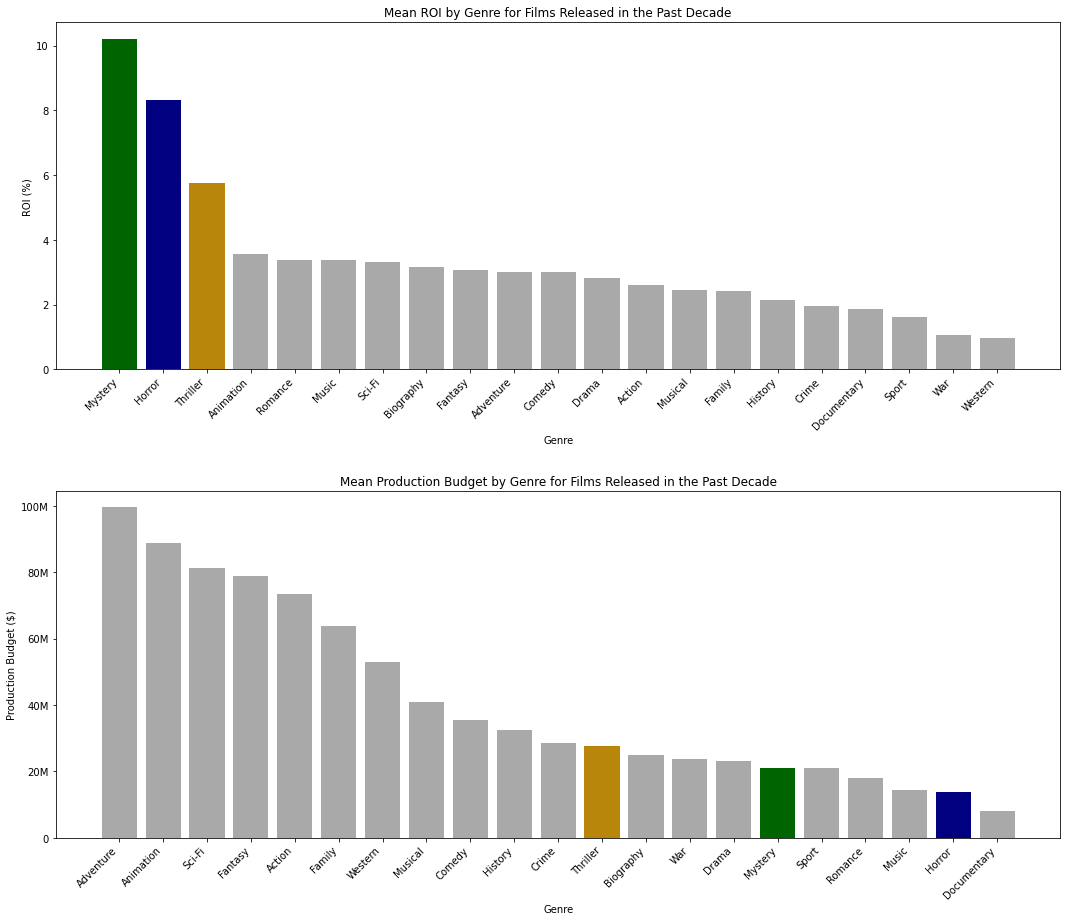

In [68]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(18,15))

colors_ax1 = ['darkgreen', 'navy', 'darkgoldenrod', 'darkgrey', 'darkgrey', 'darkgrey', 
              'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey',
              'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey',
              'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey']
ax1.bar(x=mean_ROI_by_g_df.index, height=mean_ROI_by_g_df['ROI'], color=colors_ax1)
ax1.set_xlabel('Genre')
ax1.set_ylabel('ROI (%)')
ax1.set_title('Mean ROI by Genre for Films Released in the Past Decade')

colors_ax2 = ['darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey',
              'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgoldenrod',
              'darkgrey', 'darkgrey', 'darkgrey', 'darkgreen', 'darkgrey', 'darkgrey',
              'darkgrey', 'navy', 'darkgrey']
ax2.bar(x=mean_prod_budget_by_g_df.index, height=mean_prod_budget_by_g_df['production_budget'],
        color=colors_ax2)
ax2.set_xlabel('Genre')
ax2.set_ylabel('Production Budget ($)')
ax2.set_title('Mean Production Budget by Genre for Films Released in the Past Decade')
ax2.ticklabel_format(axis='y', useOffset=False, style='plain')
y = np.array([0, 20000000, 40000000, 60000000, 80000000, 100000000])
y_ticks_labels = ["0", "20M", "40M", "60M", "80M", "100M"]
ax2.set_yticks(y)
ax2.set_yticklabels(y_ticks_labels)

plt.subplots_adjust(hspace=0.35)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha="right");
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha="right");

## Conclusion

I recommend that Microsoft's new film studio produce mystery films, horrors, or thrillers. These film genres have the highest ROI compared to the other genres types. In addition, they tend to be lower budget films, which could bode well for a brand new film studio that's entering show biz!